In [2]:
# Portfolio Optimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pandas_datareader import data as web
from datetime import datetime
plt.style.use('fivethirtyeight')

In [4]:
# Get Stock symbols in portfolio
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [5]:
# Assign weights to portfolio
weights=np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [7]:
# Get start date
stockstartdate= '2013-01-01'
stockenddate = datetime.today().strftime('%Y-%m-%d')
stockenddate

'2020-11-13'

In [9]:
df=pd.DataFrame()
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=stockstartdate, end=stockenddate)['Adj Close']


In [10]:
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823


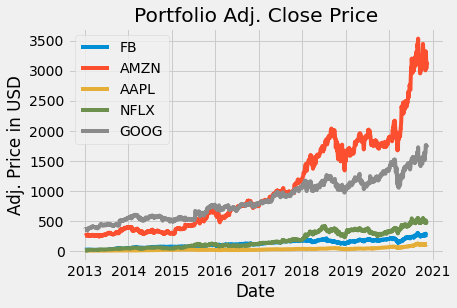

In [12]:
# Visualize stocks
title='Portfolio Adj. Close Price'
# Create and plot graph
for c in df.columns.values:
  plt.plot(df[c], label= c)

plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj. Price in USD')
plt.legend(df.columns.values, loc= 'upper left')
plt.show()

In [14]:
# Show daily returns
returns = df.pct_change()
returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974


In [17]:
# Annualized Covariance Matrix
cov_matrix= returns.cov()*252
cov_matrix

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119804,0.055643,0.045084,0.057093,0.050779
AMZN,0.055643,0.095134,0.040154,0.064024,0.048282
AAPL,0.045084,0.040154,0.081986,0.035297,0.038879
NFLX,0.057093,0.064024,0.035297,0.213109,0.049215
GOOG,0.050779,0.048282,0.038879,0.049215,0.066522


In [19]:
# Calculate portfolio Variance
port_var = np.dot(weights.T,np.dot(cov_matrix,weights))
port_var*100

6.181816577655426

In [21]:
# Calculate portfolio volatility (Std. Deviation)
port_vol=np.sqrt(port_var)
port_vol*100

24.86325919435227

In [23]:
# Annual Portfolio return
port_return = np.sum(returns.mean()*weights)*252
port_return*100

36.011867396952525

In [24]:
# Show expected annual return, volatility(risk) and Variance

percent_var=str(round(port_var,2)*100)+'%'
percent_vol = str(round(port_vol,2)*100)+'%'
percent_return = str(round(port_return,2)*100)+'%'


In [25]:
print('Expected annual return: '+ percent_return)
print('Annual Volitality (risk): '+ percent_vol)
print('Annual Var: '+ percent_var)

Expected annual return: 36.0%
Annual Volitality (risk): 25.0%
Annual Var: 6.0%


In [26]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 3.9MB/s 


In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [28]:
# Portfolio Optimization
mu =expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()

In [29]:
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.10311), ('AMZN', 0.31172), ('AAPL', 0.24892), ('NFLX', 0.33625), ('GOOG', 0.0)])
Expected annual return: 41.7%
Annual volatility: 27.4%
Sharpe Ratio: 1.45


(0.41669613614812206, 0.2740512572986555, 1.447525328138928)

In [33]:
# Get allocation of each share
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'FB': 6, 'AMZN': 1, 'AAPL': 32, 'NFLX': 11}
Funds remaining: $1105.41
